In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
#converting the dataset to df
df=pd.read_csv('C:/Users/dheer/Desktop/Deep_Learning_A_Z/power.txt',sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [58]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [59]:
df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [60]:
df.shape

(2075259, 7)

In [62]:
#drop nan values
droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:,j].notnull().all():
        droping_list_all.append(j)
droping_list_all


[0, 1, 2, 3, 4, 5, 6]

In [63]:
for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [64]:
df.isnull().sum()


Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [65]:
#eda on the data
df.tail()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2010-11-26 21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2010-11-26 21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


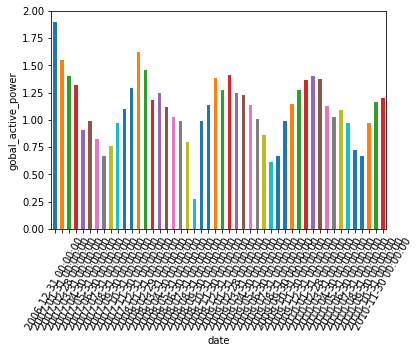

In [69]:
# global active power of the years
ax=plt.subplot()
ax=df['Global_active_power'].resample('m').mean().plot(kind='bar')
plt.xlabel('date')
plt.xticks(rotation=60)
plt.ylabel('gobal_active_power')
plt.show()

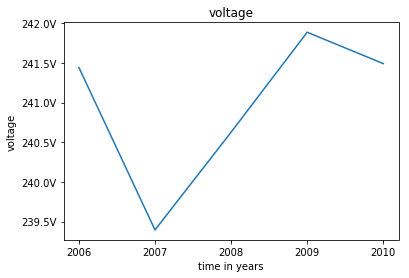

In [78]:
ax=plt.subplot()
ax=df['Voltage'].resample('y').mean().plot()
plt.xlabel('time in years')
plt.ylabel('voltage')
ax.set_yticklabels([humam(items,'V') for items in ax.get_yticks()])
plt.title('voltage')
plt.show()

In [70]:
def humam(num,units):
    units=units.lower()
    if units=='v':
        return str(num)+'V'
    if units=='a':
        return str(num)+'A'

    
        
    


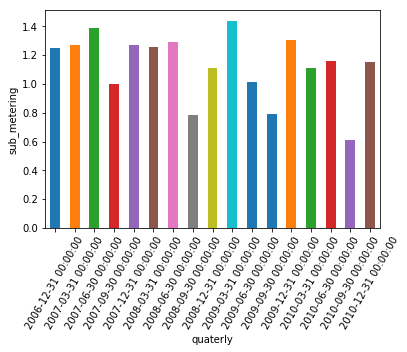

In [79]:
#sub metering over quater
ax=plt.subplot()
ax=df['Sub_metering_1'].resample('Q').mean().plot(kind='bar')
plt.xlabel('quaterly')
plt.xticks(rotation=60)
plt.ylabel('sub_metering')
plt.show()


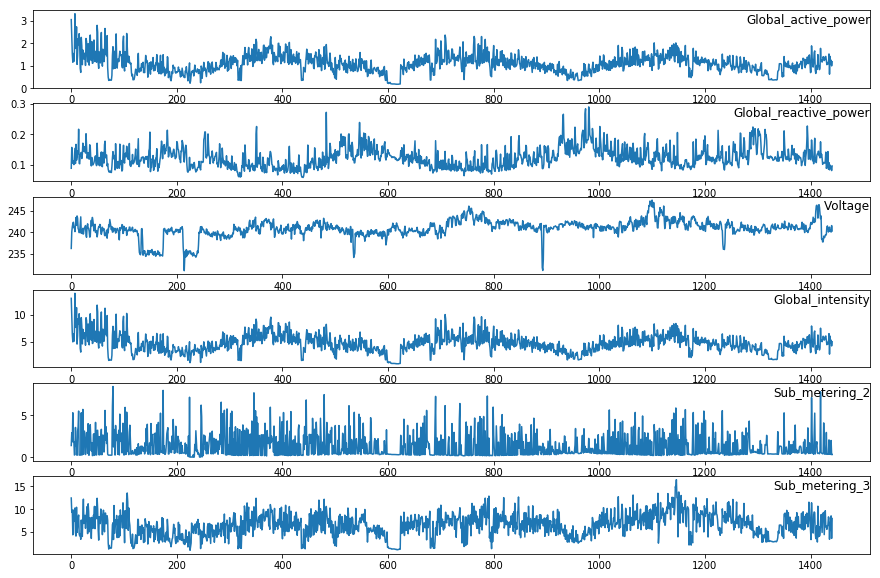

In [80]:
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()